In [1]:
import pandas as pd
import sqlite3
import requests
import numpy as np
import folium
import folium.plugins 
import matplotlib.pyplot as plt
from sklearn.cluster import OPTICS
from sklearn import cluster 
from sklearn.cluster import dbscan

In [2]:
con = sqlite3.connect('Campsite_data.db')
query = ''' SELECT * FROM Venues'''
completed_venues = pd.read_sql_query(query,con).drop('index',axis=1)
query = ''' SELECT Campsite_Name, Latitude, Longitude FROM Sites WHERE Campsite_Name like '%RV%' AND Campsite_Name not like '%closed%'   '''
df_RV = pd.read_sql_query(query,con).drop_duplicates()
con.close()
Camp_sites_onehot = pd.get_dummies(completed_venues[['Venue_Category']], prefix="", prefix_sep="")
Camp_sites_onehot['Latitude'] = completed_venues['Latitude']
Camp_sites_onehot = Camp_sites_onehot[[Camp_sites_onehot.columns[-1]] + list(Camp_sites_onehot.columns[:-1])]
campsite_grouped = Camp_sites_onehot.groupby('Latitude').mean().reset_index()
campsite_grouped_clustering = campsite_grouped.drop('Latitude', 1)
campsite_grouped

,Latitude,ATM,Accessories Store,Adult Boutique,Advertising Agency,Afghan Restaurant,African Restaurant,Airport,Airport Gate,Airport Lounge,...,Whisky Bar,Windmill,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo,Zoo Exhibit
0,22.901054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,22.905953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,23.686356,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,23.701440,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,24.150010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5274,64.832576,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5275,64.835300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5276,64.839585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5277,64.962006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
range_for_test = list(range(2,30))
opticsModel={}

for minSamples in range_for_test:
    opticsModel[minSamples] = OPTICS(min_samples=minSamples).fit(campsite_grouped_clustering.to_numpy())

/home/theia/.local/lib/python3.6/site-packages/sklearn/cluster/_optics.py:807: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
/home/theia/.local/lib/python3.6/site-packages/sklearn/cluster/_optics.py:807: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
/home/theia/.local/lib/python3.6/site-packages/sklearn/cluster/_optics.py:807: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
/home/theia/.local/lib/python3.6/site-packages/sklearn/cluster/_optics.py:807: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
/home/theia/.local/lib/python3.6/site-packages/sklearn/cluster/_optics.py:807: RuntimeWarning: divide by zero encountered in true_divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


In [4]:
result = []
for minSamples in range_for_test:
    print("Min Samples: {}, Number of groups: {}".format(minSamples,opticsModel[minSamples].labels_.max()+1))
    result.append(opticsModel[minSamples].labels_.max())

Min Samples: 2, Number of groups: 1040
Min Samples: 3, Number of groups: 395
Min Samples: 4, Number of groups: 201
Min Samples: 5, Number of groups: 111
Min Samples: 6, Number of groups: 67
Min Samples: 7, Number of groups: 41
Min Samples: 8, Number of groups: 23
Min Samples: 9, Number of groups: 19
Min Samples: 10, Number of groups: 13
Min Samples: 11, Number of groups: 11
Min Samples: 12, Number of groups: 8
Min Samples: 13, Number of groups: 7
Min Samples: 14, Number of groups: 7
Min Samples: 15, Number of groups: 6
Min Samples: 16, Number of groups: 4
Min Samples: 17, Number of groups: 3
Min Samples: 18, Number of groups: 3
Min Samples: 19, Number of groups: 2
Min Samples: 20, Number of groups: 2
Min Samples: 21, Number of groups: 2
Min Samples: 22, Number of groups: 2
Min Samples: 23, Number of groups: 1
Min Samples: 24, Number of groups: 1
Min Samples: 25, Number of groups: 1
Min Samples: 26, Number of groups: 1
Min Samples: 27, Number of groups: 1
Min Samples: 28, Number of grou

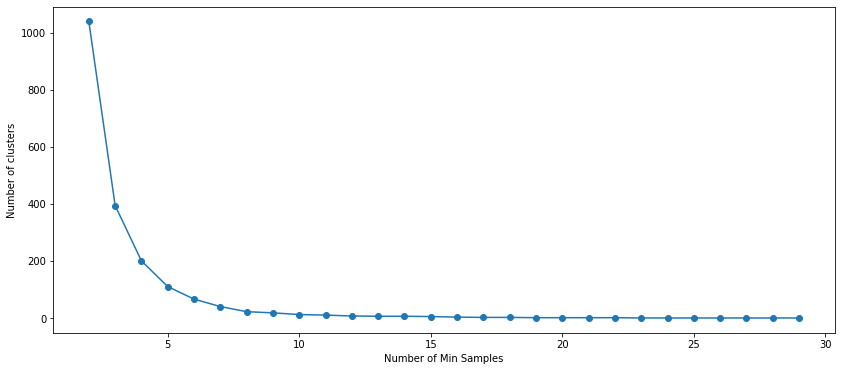

In [24]:
plt.figure(figsize=(14,6))
plt.plot(range_for_test,result, '-o')
plt.xlabel(r'Number of Min Samples')
plt.ylabel('Number of clusters')
plt.show()

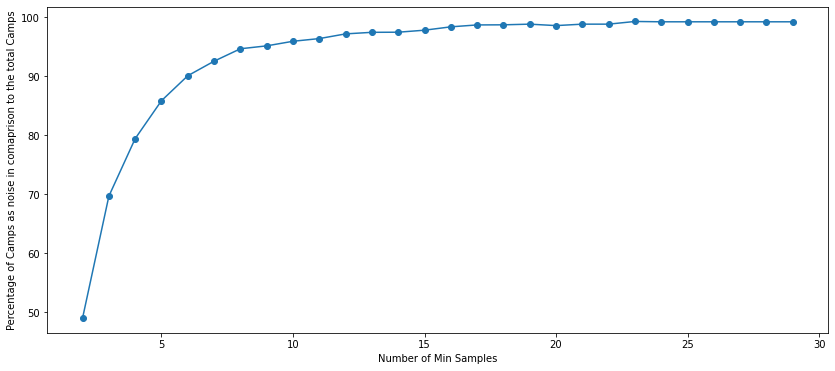

In [25]:
total_noise_calc = []
for i in range_for_test:
    a = pd.DataFrame(opticsModel[i].labels_)
    a = a[a[0]<0].count()[0]/a.count()[0]*100
    total_noise_calc.append(a)
plt.figure(figsize=(14,6))
plt.plot(range_for_test,total_noise_calc, '-o')
plt.xlabel(r'Number of Min Samples')
plt.ylabel('Percentage of Camps as noise in comaprison to the total Camps')
plt.show()